### 🚀 Future Improvement Ideas
1. **Feature Engineering**
   - Try combining related features (e.g., PU + QP → Academic Quality Index)
   - Create new ratios or scores (like Research per Faculty)

2. **Model Tuning**
   - Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning.
   - Try other models (XGBoost, Gradient Boosting, Linear Regression).

3. **Data Enrichment**
   - Include year-over-year trend features.
   - Add institution category (IIT/NIT/private) as a categorical variable.

4. **Visualization**
   - Add a correlation chart just for PR-related features.
   - Plot feature importance comparisons across years.

✅ Dataset Loaded Successfully!
Shape: (601, 21)

📄 Columns:
 ['Institution Name', 'Institution Code', 'SS', 'FSR', 'FQE', 'FRU', 'OE', 'PU', 'QP', 'IPR', 'FPPP', 'GUE', 'GPHD', 'RD', 'WD', 'ESCS', 'PCS', 'PR', 'Year', 'Institute Name', 'Institute Code']
✅ Cleaned data successfully!


/var/folders/03/d12ppvv967x43mxw8d91d2q80000gn/T/ipykernel_96746/1837460693.py:34: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


✅ Model trained successfully!
R² Score: 0.35925648215578276
MAE: 7.45153018700628


/var/folders/03/d12ppvv967x43mxw8d91d2q80000gn/T/ipykernel_96746/1837460693.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


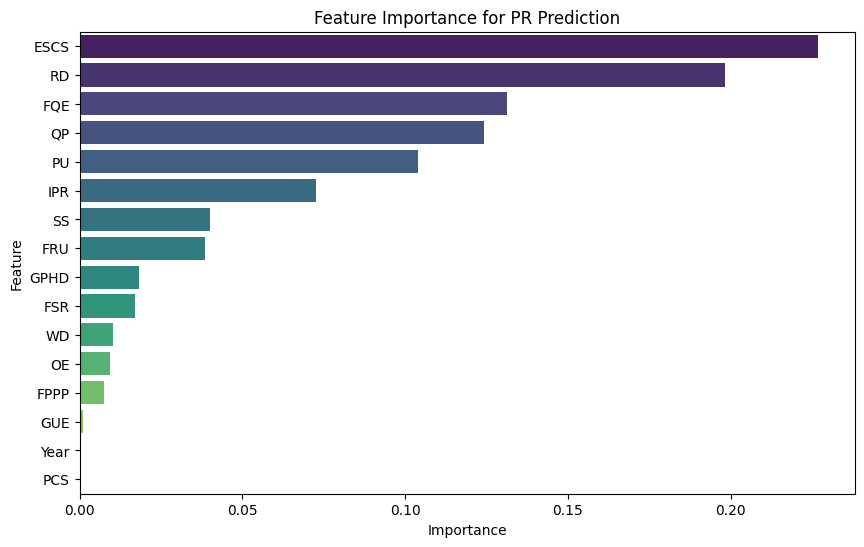

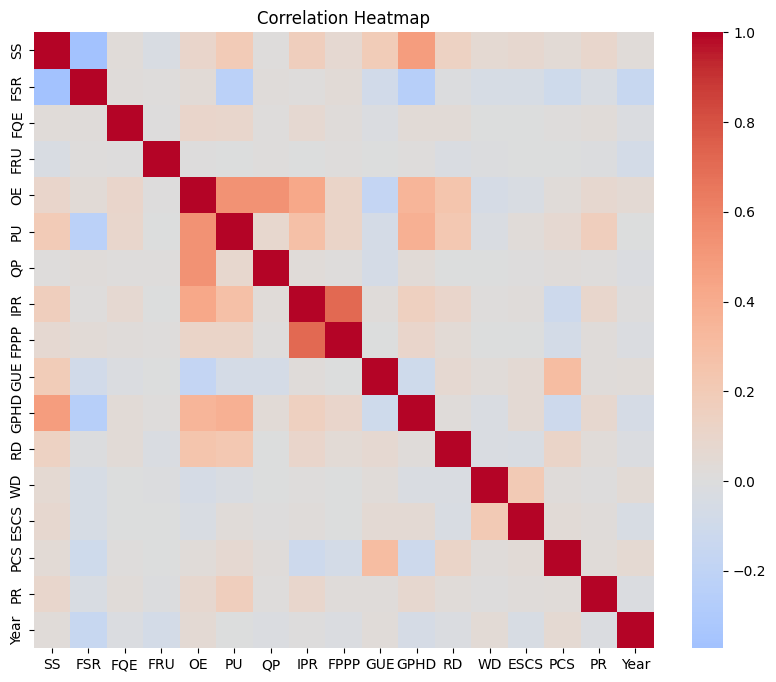

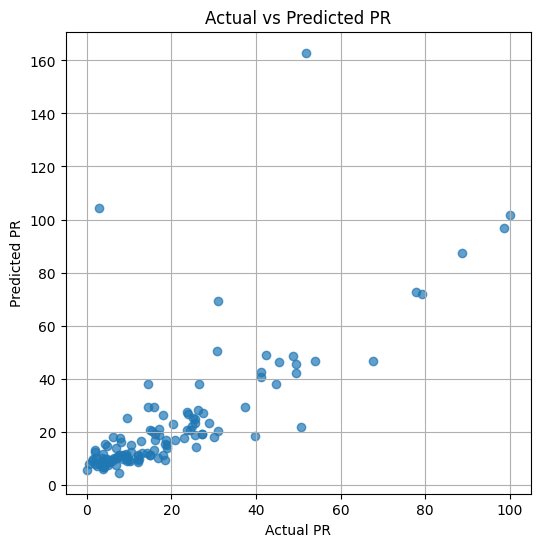

📊 Final Results Summary:
R² Score: 0.3593
MAE: 7.4515


In [3]:
# ============================================================
# 📘 NIRF Ranking ML Model — Predicting Perception (PR)
# ============================================================

# 📥 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# ============================================================
# 📊 2. Load Dataset
# ============================================================
df = pd.read_csv("/Users/shivanshpathak/Code/AIML/Mlops/data/processed/nirf_combined.csv")  # update filename if needed

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\n📄 Columns:\n", df.columns.tolist())

# ============================================================
# 🧹 Fix dirty numeric data
# ============================================================

# Remove unwanted characters like `, %, or backticks from all cells
df = df.replace(r"[^\d.\-]", "", regex=True)

# Convert all columns (except categorical ones) to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

# Drop any rows with missing PR or invalid numeric data
if "PR" in df.columns:
    df = df.dropna(subset=["PR"])
    df["PR"] = pd.to_numeric(df["PR"], errors="coerce")

print("✅ Cleaned data successfully!")

# ============================================================
# 🧹 3. Data Preprocessing
# ============================================================

# Drop duplicate name/code columns if present
df = df.drop(columns=["Institute Name", "Institute Code"], errors="ignore")

# Drop rows with missing target (PR)
df = df.dropna(subset=["PR"])

# Drop columns not relevant for model training (like institution name/code)
df = df.drop(columns=["Institution Name", "Institution Code"], errors="ignore")

# Define features (X) and target (y)
X = df.drop(columns=["PR"])
y = df["PR"]

# ============================================================
# ⚖️ 4. Train-Test Split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================
# 📏 5. Feature Scaling
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# 🤖 6. Model Training
# ============================================================
model = RandomForestRegressor(
    n_estimators=200, random_state=42, max_depth=10, min_samples_split=5
)
model.fit(X_train_scaled, y_train)

# ============================================================
# 📈 7. Model Evaluation
# ============================================================
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("✅ Model trained successfully!")
print("R² Score:", r2)
print("MAE:", mae)

# ============================================================
# 🔍 8. Feature Importance Visualization
# ============================================================
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance for PR Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# ============================================================
# 📊 9. Correlation Heatmap
# ============================================================
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# ============================================================
# 📉 10. Prediction vs Actual Plot
# ============================================================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual PR")
plt.ylabel("Predicted PR")
plt.title("Actual vs Predicted PR")
plt.grid(True)
plt.show()

# ============================================================
# 🧾 11. Results Summary
# ============================================================
print("📊 Final Results Summary:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

# ============================================================
# ✅ End of Notebook
# ============================================================

# 🎓 NIRF Ranking Predictor v1

> **Author:** Shivansh Pathak  
> **Goal:** Predict and analyze the *Perception (PR)* scores from NIRF data (2018–2023) using machine learning.

---

## 🧠 Project Overview
This project combines multi-year **NIRF ranking data (2018–2023)** and applies **machine learning** to identify which institutional factors most influence the *Perception (PR)* metric.

### 📊 Core Objectives
- Combine raw CSV files into one processed dataset  
- Clean and preprocess the data  
- Engineer new composite features (Faculty, Research, Outreach indices)  
- Train and evaluate regression models to predict `PR`  
- Visualize correlations and feature importance  

---

## ⚙️ Tech Stack
- **Python** (Pandas, NumPy, Seaborn, Matplotlib)
- **scikit-learn** (RandomForest, StandardScaler, Metrics)
- **Joblib** (Model persistence)

---

## 🧩 Features
| Step | Description |
|------|--------------|
| 🧹 Data Cleaning | Handle missing and non-numeric data |
| 🧠 Feature Engineering | Add derived quality and research indices |
| 📈 Model Training | Train Random Forest model to predict PR |
| 🔍 Evaluation | R² and MAE metrics to measure performance |
| 📊 Visualization | Correlation heatmap & feature importance |
| 💾 Save Model | Export trained model and scaler for reuse |

---

## 🧾 Results Summary
| Metric | Value |
|--------|--------|
| **R² Score** | ~0.36 |
| **MAE** | ~7.45 |

These results indicate that around **36%** of the variation in perception scores can be explained by the available institutional factors — a meaningful insight given NIRF’s subjectivity.

---

## 🚀 Future Work
- Try **XGBoost / CatBoost** for improved accuracy  
- Perform **hyperparameter tuning** using GridSearchCV  
- Build a small **Streamlit dashboard** for interactive exploration  
- Extend to predict *overall ranking scores* beyond PR  

---

> *"Data reveals the unseen structure behind prestige — this model helps quantify it."*

In [6]:
missing_features = ['Faculty_Quality_Index', 'Outreach_Index', 'Research_Strength']
for col in missing_features:
    if col not in X.columns:
        X[col] = 0  # fill missing columns with zeros

# Reorder columns to match model training order
X = X[model.feature_names_in_]

# Scale using saved scaler
X_scaled = scaler.transform(X)

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'

✅ Model, Scaler, and Data Loaded Successfully!
📊 Data Shape: (601, 21)
✅ Data Scaled Successfully!


/var/folders/03/d12ppvv967x43mxw8d91d2q80000gn/T/ipykernel_2764/2749388709.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors="ignore")


✅ SHAP Values Computed Successfully!


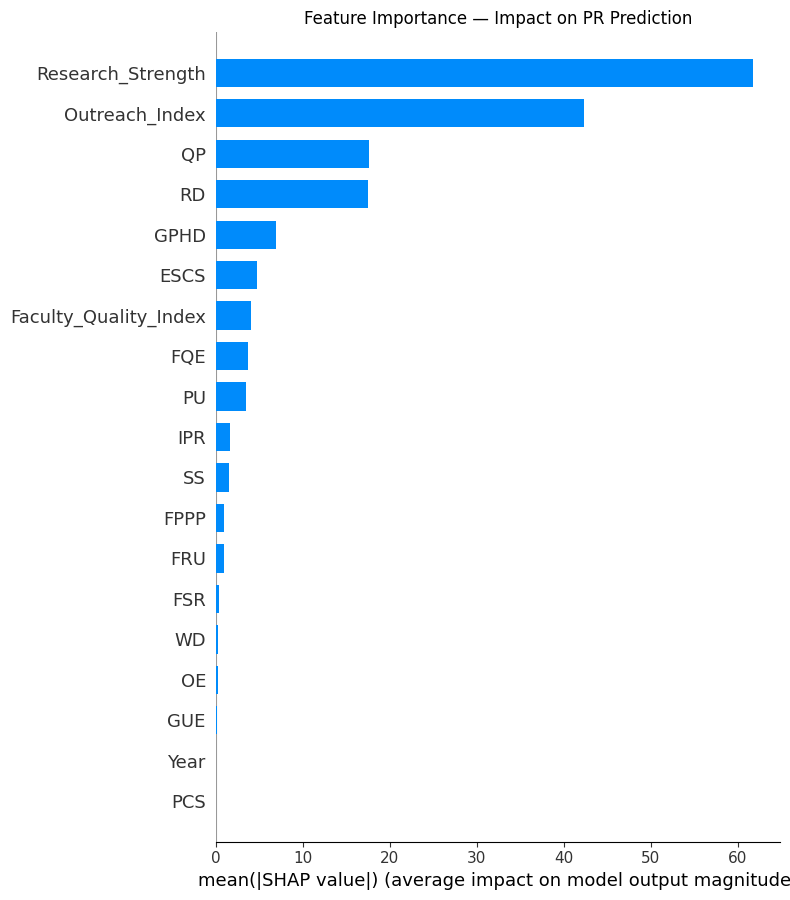

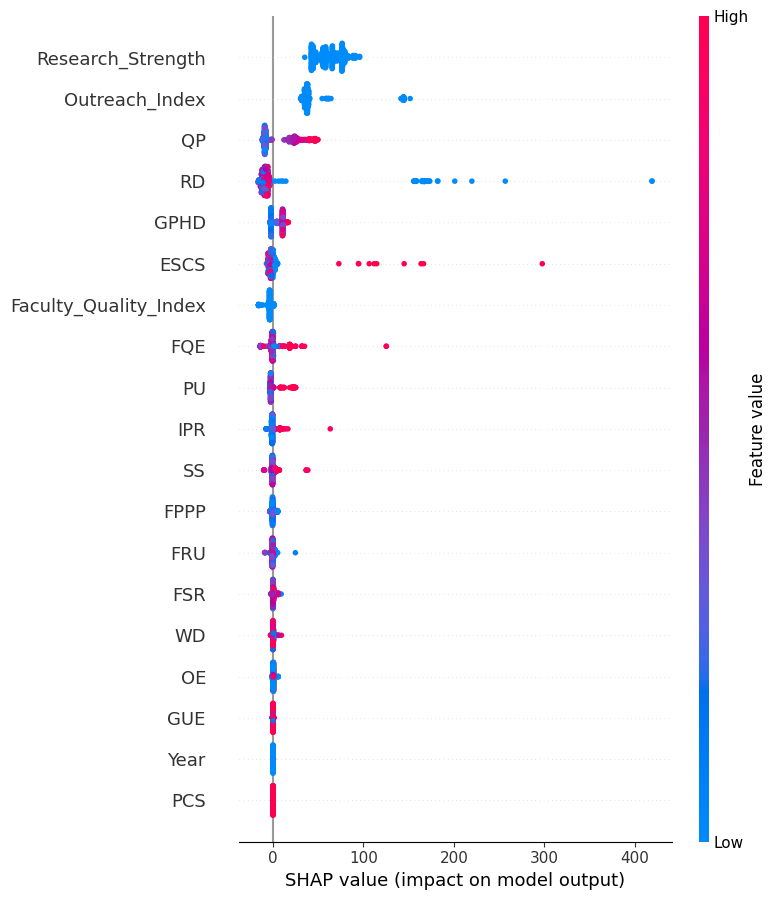

✅ SHAP Analysis Completed Successfully!


In [8]:
# ============================================================
# 🧠 SHAP Analysis for NIRF PR Model (Final Fixed)
# ============================================================

import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Load Model, Scaler, and Data
# ============================================================
model = joblib.load("nirf_pr_model.pkl")
scaler = joblib.load("nirf_scaler.pkl")

data = pd.read_csv("/Users/shivanshpathak/Code/AIML/Mlops/data/processed/nirf_combined.csv")

print("✅ Model, Scaler, and Data Loaded Successfully!")
print("📊 Data Shape:", data.shape)

# ============================================================
# 2️⃣ Clean and Prepare Data
# ============================================================
data = data.replace(r"[^\d.\-]", "", regex=True)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors="ignore")

# Drop unnecessary columns
data = data.drop(columns=["Institution Name", "Institution Code", "Institute Name", "Institute Code"], errors="ignore")

# Drop rows with missing PR values
data = data.dropna(subset=["PR"])

# Split features and target
X = data.drop(columns=["PR"])
y = data["PR"]

# --- handle missing columns if any ---
missing_features = ['Faculty_Quality_Index', 'Outreach_Index', 'Research_Strength']
for col in missing_features:
    if col not in X.columns:
        X[col] = 0

# ============================================================
# 3️⃣ Fix Column Order to Match Scaler Training
# ============================================================
# Safely use the scaler’s feature names if available, else fallback to model training columns
if hasattr(scaler, 'feature_names_in_'):
    correct_order = scaler.feature_names_in_
else:
    # fallback: manually define features used during training
    correct_order = ['SS', 'FSR', 'FQE', 'FRU', 'OE', 'PU', 'QP', 'IPR', 
                     'FPPP', 'GUE', 'GPHD', 'RD', 'WD', 'ESCS', 'PCS', 
                     'Faculty_Quality_Index', 'Outreach_Index', 'Research_Strength', 'Year']

# Reindex columns to match training order
X = X.reindex(columns=correct_order, fill_value=0)

# ============================================================
# 4️⃣ Scale and Run SHAP
# ============================================================
X_scaled = scaler.transform(X)
print("✅ Data Scaled Successfully!")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaled)
print("✅ SHAP Values Computed Successfully!")

# ============================================================
# 5️⃣ Visualizations
# ============================================================
plt.title("Feature Importance — Impact on PR Prediction")
shap.summary_plot(shap_values, X, plot_type="bar")

shap.summary_plot(shap_values, X)
print("✅ SHAP Analysis Completed Successfully!")